# Exercise 2.4 - Hyperparameter Optimisation (Random Forest)

This script is organised using the following structure:
1. **Importing Data and Libraries**
2. **Data Wrangling**
   
   2.1 Reduce data to single decade | 2.2 Checking total entries for each station | 2.3 Dropping unnecessary columns | 2.4 Reshaping and Remodeling

3. **Random Forest Model + Hyperparameter Optimisations (All Stations Decade)**

   3.1 Grid Search | 3.2 Random Search | 3.3 Results Compared | 3.4 Random Forest with Optimal Hyperparameters
   
4. **Feature Importance (All Stations Decade)**
5. **Random Forest Model + Hyperparameter Optimisations (Madrid - Full Data)**

   5.1 Data Wrangling - Madrid | 5.2 Grid Search | 5.3 Random Search | 5.4 Results Compared | 5.5 Random Forest with Optimal Hyperparameters

## 1. Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import plot_tree

# Packages and functions specific to this exercise:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set path
path = r'C:\Users\kyles\CareerFoundary\Machine Learning\Achievement 2'

In [3]:
# Import cleaned data
df_weather = pd.read_csv(os.path.join(path, '02 Data', 'Cleaned_Weather_Data_with_dates.csv'))
df_weather.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
# Check
df_weather

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,...,14.2,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,20221028,10,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,...,14.3,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,20221029,10,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,...,14.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,20221030,10,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,...,12.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [5]:
# Import pleasant weather answers
df_answers = pd.read_csv(os.path.join(path, '02 Data', 'Pleasant_Weather_Prediction_Answers.csv'))

In [6]:
# Check
df_answers

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df_answers

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Data Wrangling

### 2.1 Reduce data to single decade

In [8]:
# Reduce weather data to a single decade (2000 to 2009)
df_decade = df_weather[(df_weather['DATE'].astype(str).str[:4] >= '2000') & (df_weather['DATE'].astype(str).str[:4] <= '2009')]

# Check
df_decade

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14610,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,0.7,6,0.89,1.0235,0.22,0.10,0.7,6.6,2.1,11.0
14611,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,2.0,8,0.92,1.0177,0.13,0.42,0.0,9.6,7.3,10.6
14612,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,2.8,4,0.79,1.0154,0.22,1.05,1.2,8.6,7.3,9.9
14613,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,4.6,6,0.76,1.0099,0.36,0.34,3.5,8.1,5.0,7.7
14614,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,2.9,7,0.81,0.9957,0.12,0.33,0.0,7.7,4.0,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,20091227,12,7,0.80,1.0118,0.37,0.18,2.3,1.0,-3.9,...,-2.7,4,0.72,1.0039,0.37,0.01,4.7,7.2,5.8,8.5
18259,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,2.4,8,0.70,0.9975,0.22,1.25,0.0,4.8,1.4,8.3
18260,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,0.8,8,0.88,0.9866,0.12,2.84,0.0,3.4,2.6,4.2
18261,20091230,12,8,0.92,0.9979,0.18,1.54,0.0,8.5,7.5,...,-7.4,8,0.87,0.9862,0.12,1.46,0.0,3.1,2.1,4.2


In [9]:
# Reduce answers data to a single decade (2000 to 2009)
answers_decade = df_answers[(df_answers['DATE'].astype(str).str[:4] >= '2000') & (df_answers['DATE'].astype(str).str[:4] <= '2009')]

# Check
answers_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14610,20000101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14611,20000102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14612,20000103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14613,20000104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14614,20000105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,20091227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18259,20091228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18260,20091229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18261,20091230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2.2 Check total entries for each station

In [10]:
# Create set of unique stations
unique_stations = set([col.split('_')[0] for col in df_decade.columns if '_' in col])
# Check
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [11]:
# Create dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select all columns for current station
    station_columns = [col for col in df_decade.columns if col.startswith(station)]
    # Count non-missing entries across all columns
    station_frequencies[station] = df_decade[station_columns].notna().sum().sum()
    # First .sum() adds non-missing values for each column (makes list), second .sum() adds list together

# Print the frequency of entries for each station
for station, frequency in station_frequencies.items():
    print(f"{station}: {frequency} entries")

MADRID: 32877 entries
LJUBLJANA: 32877 entries
MAASTRICHT: 32877 entries
MUNCHENB: 32877 entries
SONNBLICK: 32877 entries
BASEL: 32877 entries
OSLO: 32877 entries
KASSEL: 32877 entries
DEBILT: 32877 entries
BUDAPEST: 32877 entries
DUSSELDORF: 32877 entries
STOCKHOLM: 32877 entries
VALENTIA: 32877 entries
BELGRADE: 32877 entries
HEATHROW: 32877 entries


All stations have the same number of entries

### 2.3 Dropping Unnecessary Columns

In [12]:
df_decade = df_decade.drop(columns=["DATE", "MONTH"])
df_decade.shape # should have 135 columns

(3653, 135)

In [13]:
answers_decade = answers_decade.drop(columns = ['DATE'])
answers_decade.shape # Should have 15 columns

(3653, 15)

### 2.4 Reshaping and Remodeling

In [14]:
# Start with some conventional renamings
X = df_decade
y = answers_decade

# Check shapes
print(X.shape)
print(y.shape)

(3653, 135)
(3653, 15)


In [15]:
# Reshape y so that its shape is (3653, )
y = y.max(axis = 1)
print(y.shape)

(3653,)


In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [17]:
# Check Shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739,)
(914, 135) (914,)


## 3. Random Forest Model + Hyperparameter Optimisations (All Stations Decade)

### 3.1 - Grid Search

In [18]:
# Create Random Forest classifier
clf1 = RandomForestClassifier() 

In [19]:
# Grid search cv
grid_space = {'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[15,50,100,135],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
             }

In [20]:
start = time.time()
grid = GridSearchCV(clf1, param_grid = grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 5.4853210806846615 minutes


In [21]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 10, 'max_features': 135, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best GRID search score is: 0.9832055494706097


### 3.2 - Random Search

In [22]:
# Create Random Forest classifier
clf2 = RandomForestClassifier()

In [23]:
# Random search cv
rs_space = {'max_depth':list(np.arange(10, 100, step=10)) + [None],
            'n_estimators':np.arange(10, 500, step=50),
            'max_features':randint(15,135),
            'criterion':['gini','entropy'],
            'min_samples_leaf':randint(1,4),
            'min_samples_split':np.arange(2, 10, step=2)
           }

In [24]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 0.7243157982826233 minutes


In [25]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 123, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 110}
Best RANDOM search score is: 0.9839357429718875


### 3.3 Results Compared

In [26]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 10, 'max_features': 135, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best GRID search score is: 0.9832055494706097
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 123, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 110}
Best RANDOM search score is: 0.9839357429718875


**RANDOM search** finished with the best score (by a small amount). RANDOM search was also the most efficient in this situation (completed much faster than grid search). 

**Will use RANDOM search hyperparameters for Random Forest**

### 3.4 Random Forest with Optimal Hyperparameters

In [27]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 110, 
                              max_depth = 10, 
                              max_features = 123, 
                              min_samples_leaf = 3, 
                              min_samples_split = 2,
                              criterion = 'entropy'
                             )

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=123,
                       min_samples_leaf=3, n_estimators=110)

In [28]:
# Performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Using metrics module for accuracy calculation
print("Model Accuracy: ", (metrics.accuracy_score(y_test, y_pred))*100,'%')

Model Accuracy:  97.70240700218818 %


In [29]:
# Check unique values in y
unique_classes = np.unique(y)
print(unique_classes)
print(len(unique_classes)) 

[0 1]
2


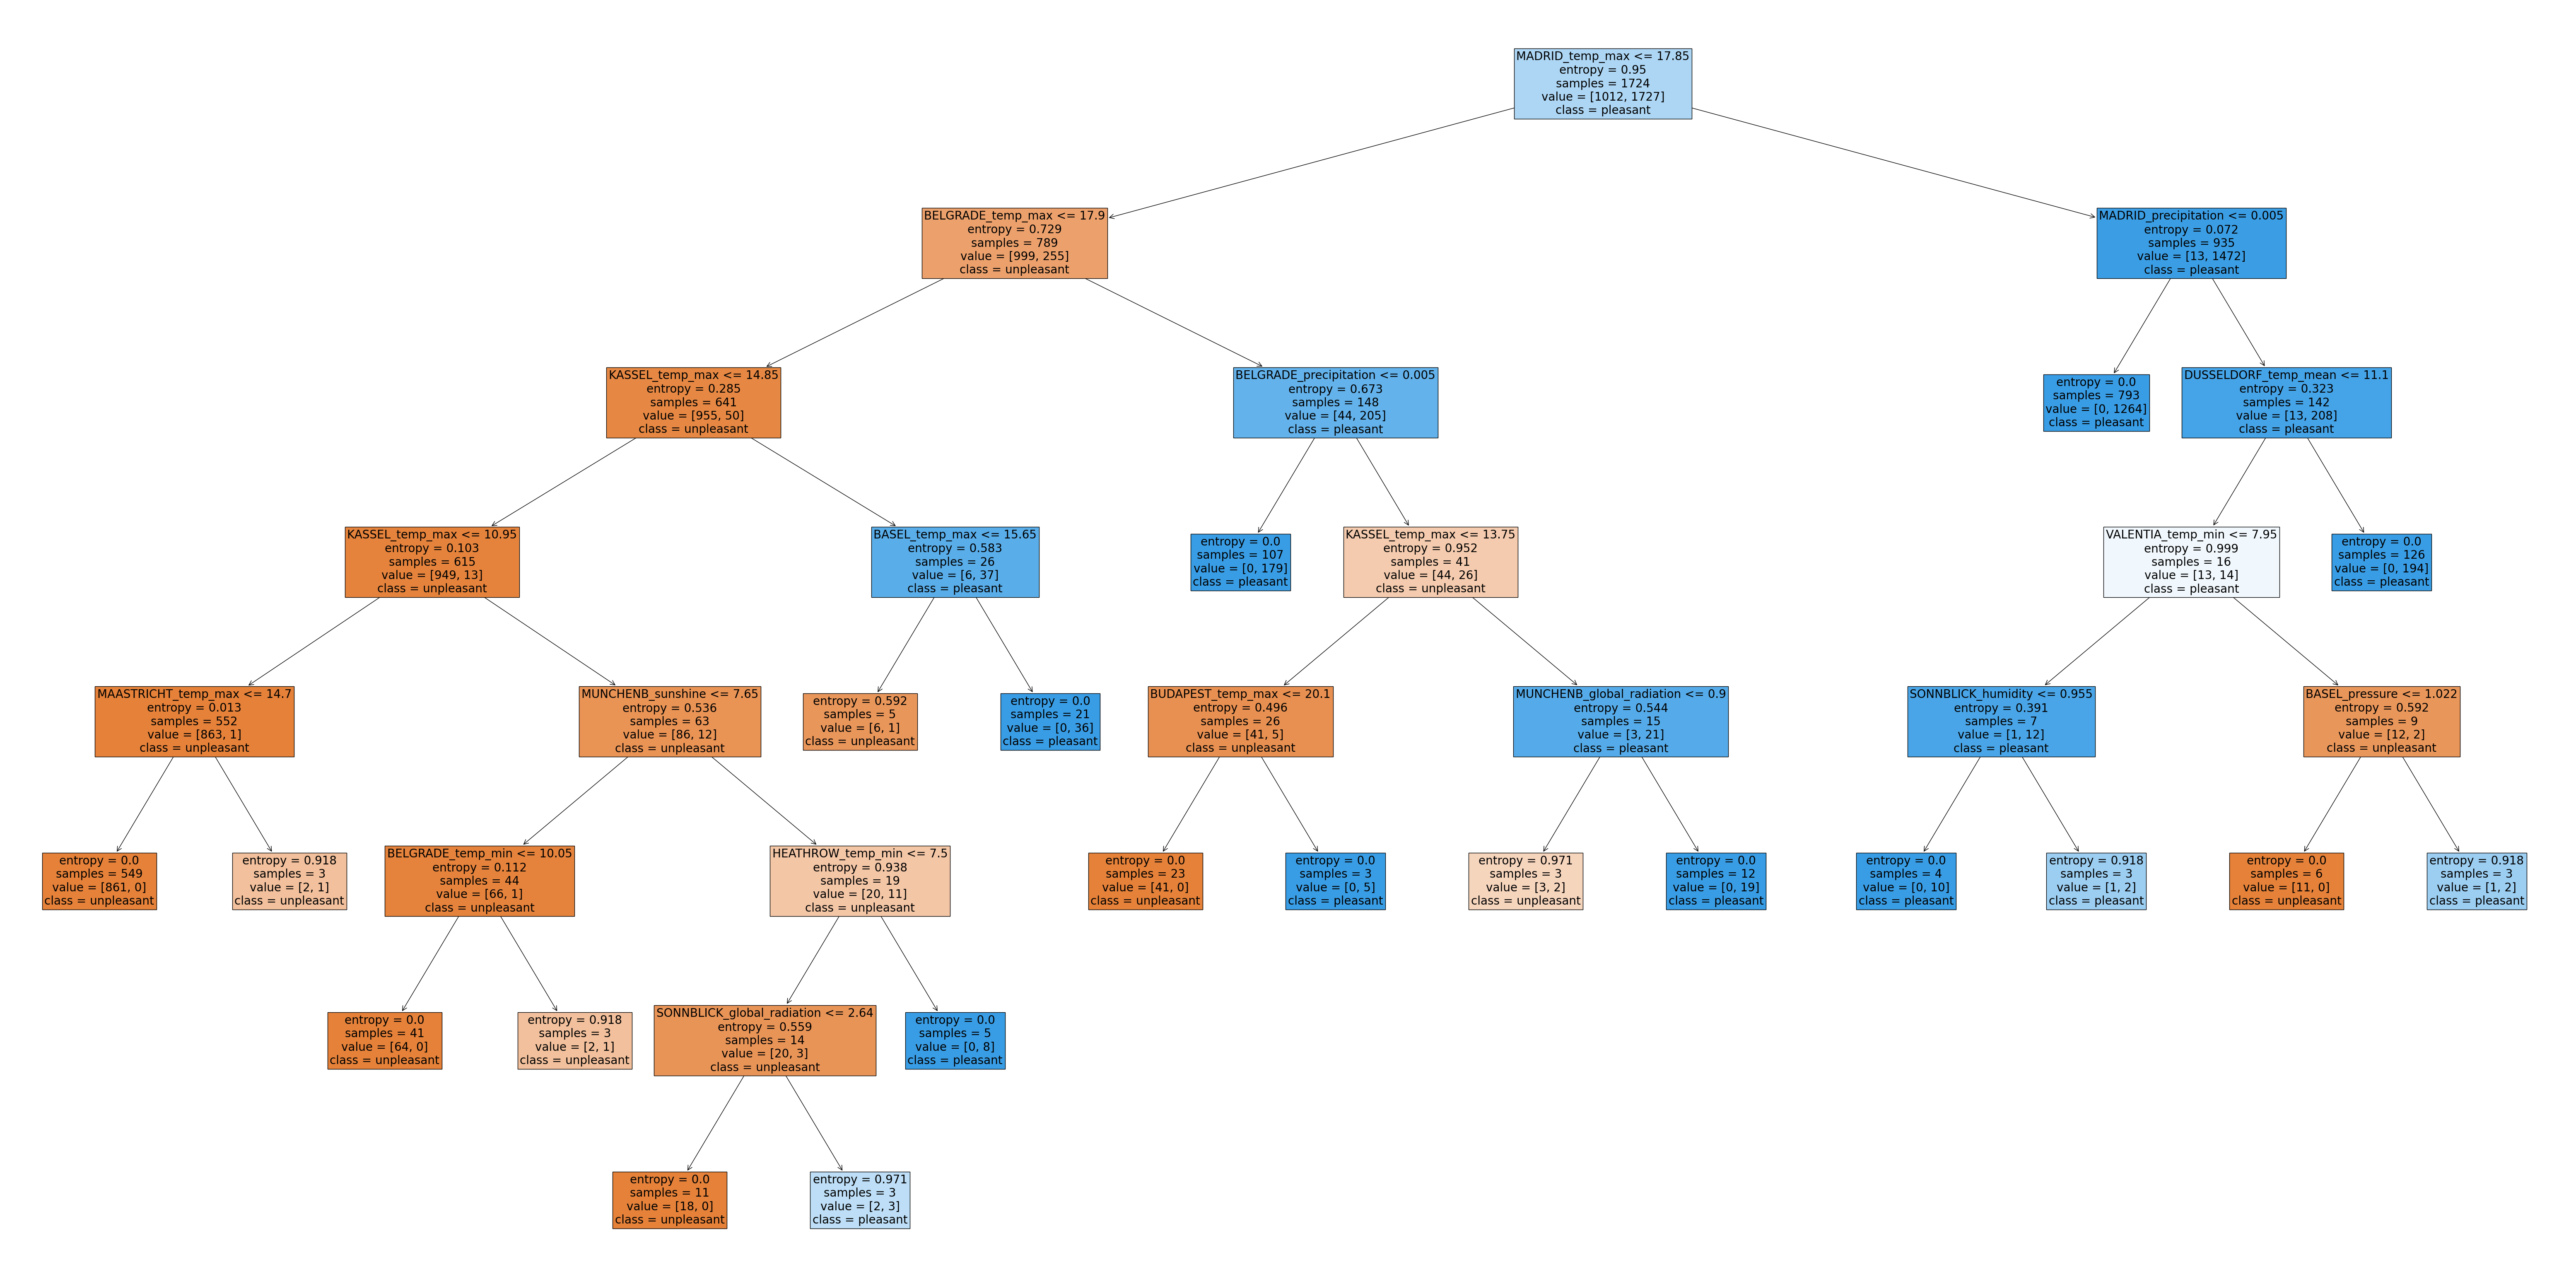

In [30]:
# Define class_names
class_names = ['unpleasant', 'pleasant']

# Plot random forest for tree 20
tree_20 = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[20], fontsize = 20, feature_names=df_decade.columns, class_names = class_names, filled=True)
plt.show();

In [31]:
# Save tree 20
tree_20.savefig(os.path.join(path, '04 Analysis', 'Random Forests', 'optimized_random_forest_2000s_tree_20.png'),bbox_inches='tight')

## 4. Feature Importance (All Stations Decade)

In [32]:
np.set_printoptions(threshold=np.inf)
feature_importances = clf3.feature_importances_
print(feature_importances)
print(feature_importances.shape)

[6.04122059e-05 8.08207169e-05 2.82852023e-04 1.82442875e-04
 1.44847668e-04 3.68184725e-04 7.75178734e-04 2.40595564e-04
 8.76966897e-03 1.56500980e-04 6.43630850e-04 2.01116550e-04
 4.53409302e-04 3.37893757e-02 1.89202005e-03 4.97166948e-03
 2.70290384e-04 1.41306358e-01 1.36490347e-04 1.06956003e-03
 9.22057760e-05 1.52802401e-03 4.41559133e-04 2.23132054e-03
 1.52750252e-02 2.50739588e-04 8.06352379e-02 1.35654664e-04
 2.42659751e-04 1.21098628e-04 2.28835514e-03 1.11587433e-04
 2.14357525e-04 2.78633408e-03 4.19995371e-04 7.15564383e-03
 1.40116163e-05 2.21218061e-04 3.60563709e-04 1.63750261e-04
 8.07368704e-05 3.20636968e-05 1.51805705e-03 1.88158440e-04
 1.09607875e-02 1.65085078e-04 1.93294728e-04 1.38172500e-04
 2.81642430e-04 3.85329084e-05 1.30880753e-04 3.26688201e-04
 5.21190026e-04 6.38342871e-03 2.16794634e-05 0.00000000e+00
 1.51814803e-04 7.70870880e-05 3.89931496e-04 8.83615253e-05
 3.77818967e-04 8.52390293e-04 2.67567444e-02 0.00000000e+00
 5.22057430e-04 1.637004

In [33]:
# Must reshape feature_importances to (1, 15, 9)
reshaped_importances = feature_importances.reshape(-1, 15, 9) # 15 weather stations and 9 weather observations
print(reshaped_importances.shape)

(1, 15, 9)


In [34]:
# Collapse shape into one observation for each weather station
collapsed_importances = np.sum(reshaped_importances[0], axis = 1)

# Check
print(collapsed_importances.shape)
print(collapsed_importances)

(15,)
[0.010905   0.18368437 0.10166016 0.01347569 0.01353935 0.00817892
 0.02871583 0.00513818 0.00622706 0.60538881 0.01248354 0.00295986
 0.00280143 0.00305734 0.00178448]


In [35]:
# Turn importances into a DataFrame with their associated weather stations
## Start by creating a list of weather stations
weather_stations = sorted(list(set([col.split('_')[0] for col in answers_decade])))

importance_df = pd.DataFrame({'Weather Station' : weather_stations, 'Importance' : collapsed_importances}).sort_values(by = 'Importance', ascending = False)
importance_df

,Weather Station,Importance
9,MADRID,0.605389
1,BELGRADE,0.183684
2,BUDAPEST,0.101660
6,KASSEL,0.028716
4,DUSSELDORF,0.013539
3,DEBILT,0.013476
10,MUNCHENB,0.012484
0,BASEL,0.010905
5,HEATHROW,0.008179
8,MAASTRICHT,0.006227


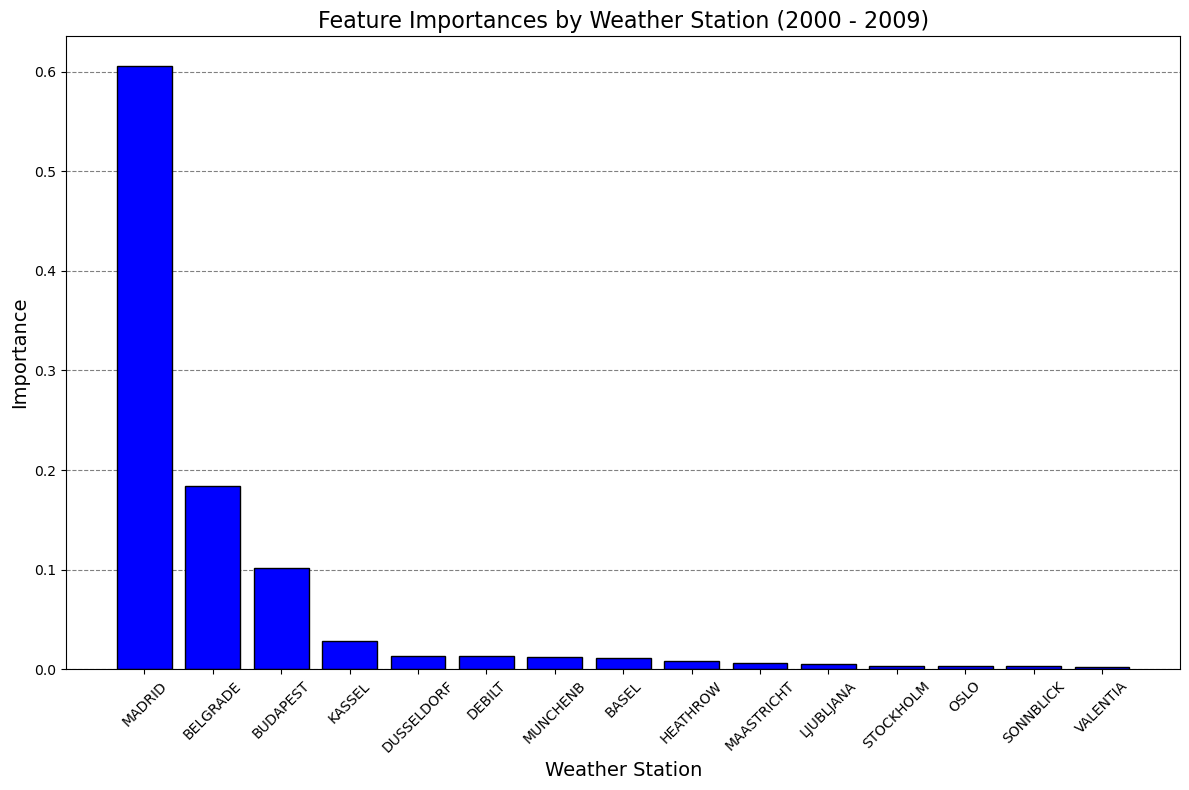

In [36]:
# Plot the importances

importances_plot = plt.figure(figsize=(12, 8))
plt.bar(importance_df['Weather Station'], importance_df['Importance'], color = 'blue', zorder = 2, edgecolor = 'black')
plt.xticks(rotation = 45, ha = 'center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2000 - 2009)', fontsize=16)
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.tight_layout()
plt.show()

In [37]:
# Save importances_plot
importances_plot.savefig(os.path.join(path, '04 Analysis', 'Random Forests', 'optimised_feature_importances_2000s.png'),bbox_inches='tight')

## 5. Random Forest Model + Hyperparameter Optimisations (Madrid - Full Data)

### 5.1 Data Wrangling - Madrid

In [55]:
# Filter df_weather to only include Madrid data for all years
X_mad = df_weather[df_weather.columns[df_weather.columns.str.startswith('MADRID')]]
X_mad

,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max
0,6,0.92,1.0260,0.53,0.00,1.4,7.6,4.4,10.8
1,7,0.86,1.0254,0.46,0.00,0.9,9.8,7.4,12.2
2,5,0.90,1.0287,0.63,0.00,2.3,8.6,6.4,10.8
3,0,0.75,1.0281,1.16,0.00,8.7,10.3,4.5,16.1
4,2,0.64,1.0269,1.10,0.00,7.8,12.1,8.2,16.0
...,...,...,...,...,...,...,...,...,...
22945,8,0.52,1.0204,1.89,0.12,5.3,20.0,16.2,23.9
22946,8,0.51,1.0221,1.89,0.12,3.9,19.1,14.7,23.5
22947,8,0.46,1.0186,1.89,0.12,8.1,19.0,15.4,22.6
22948,5,0.66,1.0186,1.89,0.12,3.1,15.7,13.1,18.3


In [56]:
# Must also filter answers data to only include Madrid
y_mad = df_answers[df_answers.columns[df_answers.columns.str.startswith('MADRID')]]
y_mad

,MADRID_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [57]:
# Ensure correct shape for y
y_mad = y_mad.max(axis=1)
print(y_mad.shape) # Check new shape - should be (22950, )
print(y_mad.unique()) # Check unique values in answers - should be 0 and 1

(22950,)
[0 1]


Shapes of X and y both verified above. Move on to splitting the data into training and testing sets

In [58]:
X_train_mad, X_test_mad, y_train_mad, y_test_mad = train_test_split(X_mad, y_mad, random_state=42)

# Check shapes
print(X_train_mad.shape, y_train_mad.shape)
print(X_test_mad.shape, y_test_mad.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### 5.2 Grid Search

In [59]:
# Create Random Forest model for Madrid
clf_mad1 = RandomForestClassifier()

In [60]:
# Grid search cv
grid_space_mad = {'max_depth':[3,5,10,None],
                  'n_estimators':[10,100,200],
                  'max_features':[1,3,6,9],
                  'min_samples_leaf':[1,2,3],
                  'min_samples_split':[1,2,3]
                 }

In [61]:
start = time.time()
grid = GridSearchCV(clf_mad1, param_grid = grid_space_mad, cv = 3, scoring = 'accuracy', verbose = 3, n_jobs = -1)
model_grid = grid.fit(X_train_mad, y_train_mad)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 0.8049777626991272 minutes


In [62]:
# Print grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0


### 5.3 Random Search

In [72]:
# Create second Random Forest model for Madrid
clf_mad2 = RandomForestClassifier()

In [73]:
# Define random search cv
rs_space_mad = {'max_depth':list(np.arange(10, 100, step=10)) + [None],
                'n_estimators':np.arange(10, 500, step=50),
                'max_features':randint(1,9),
                'criterion':['gini','entropy'],
                'min_samples_leaf':randint(1,4),
                'min_samples_split':np.arange(2, 10, step=2)
               }

In [74]:
start = time.time()
rf_random = RandomizedSearchCV(clf_mad2, rs_space_mad, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train_mad, y_train_mad)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 0.07789230346679688 minutes


In [75]:
# Random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 80, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 110}
Best RANDOM search score is: 1.0


### 5.4 Results Compared

In [76]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 80, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 110}
Best RANDOM search score is: 1.0


It would appear both optimisation strategies return a perfect score.

It may be worth trialling both sets of hyperparameters (since they are so different). Perhaps the model's accuracy may not change much and would illustrate that picking the more efficient model is the way to go.

### 5.5 Random Forests with Optimal Hyperparameters

#### Using Hyperparameters from Grid Search:

In [79]:
# Create Random Forest Classifier (grid search parameters first)
clf_mad3 = RandomForestClassifier(n_estimators = 10, 
                                  max_depth = 3, 
                                  max_features = 6, 
                                  min_samples_leaf = 2, 
                                  min_samples_split = 2
                                 )

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_mad3.fit(X_train_mad, y_train_mad)

RandomForestClassifier(max_depth=3, max_features=6, min_samples_leaf=2,
                       n_estimators=10)

In [81]:
# Performing predictions on the test dataset
y_pred_mad = clf_mad3.predict(X_test_mad)
  
# Using metrics module for accuracy calculation
print("Model Accuracy: ", (metrics.accuracy_score(y_test_mad, y_pred_mad))*100,'%')

Model Accuracy:  99.82572324851866 %


**Note:** This is marginally higher than before

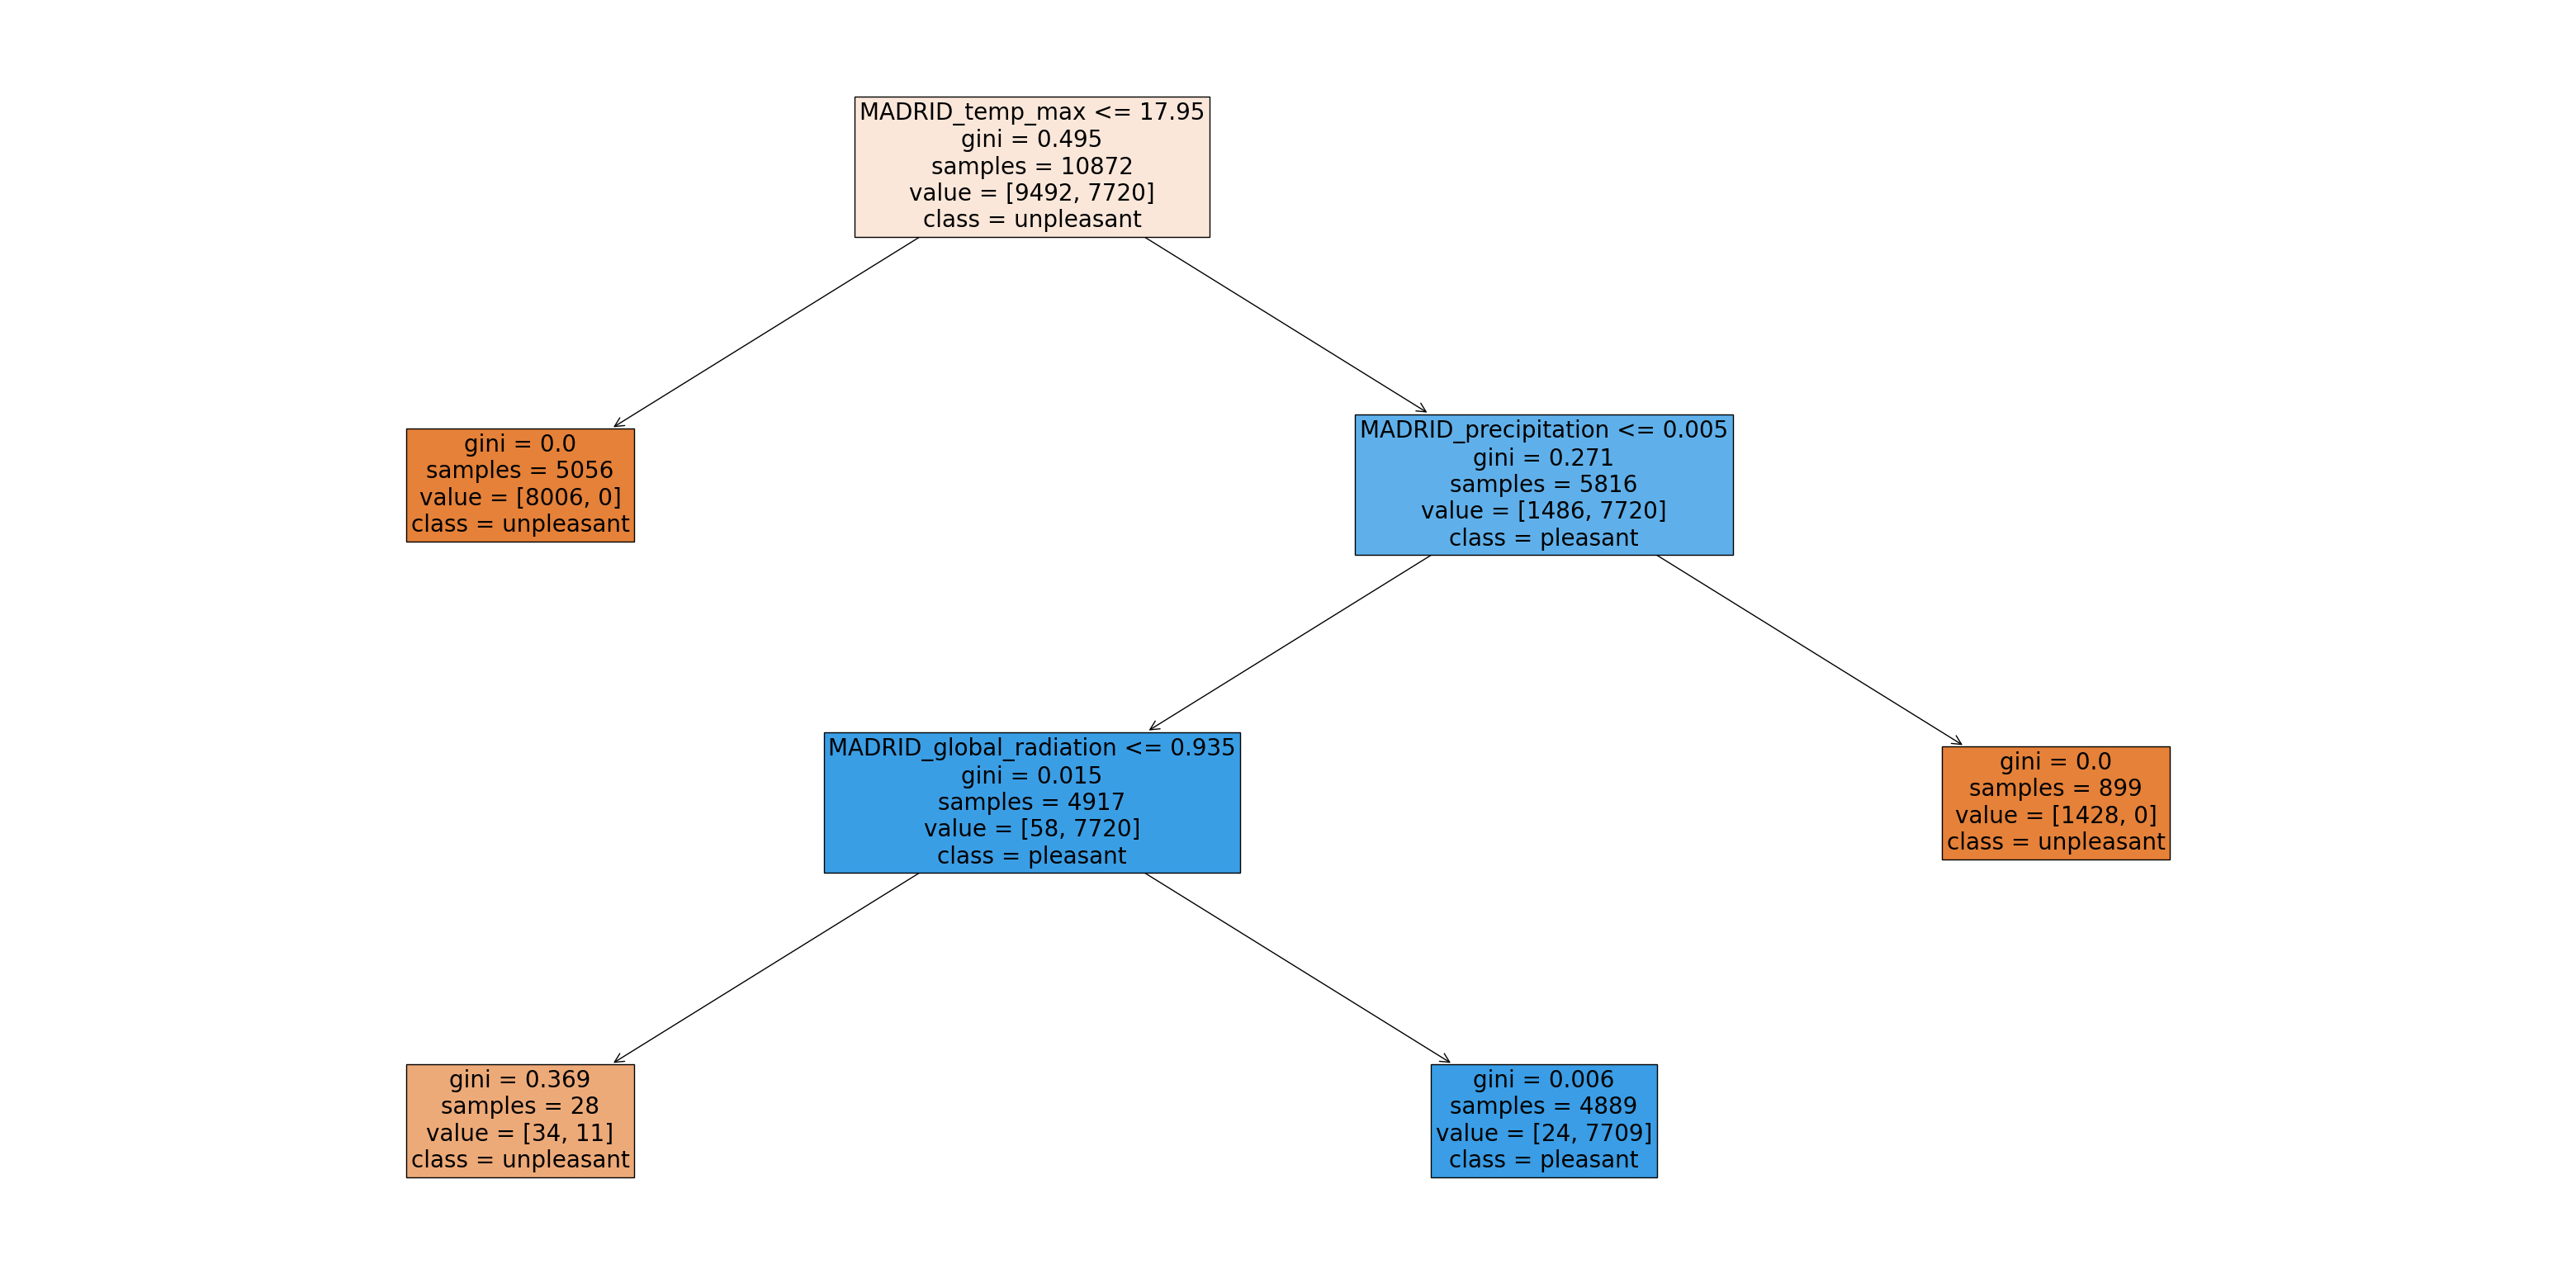

In [84]:
# Plot random forest (Madrid)
Madrid_tree = plt.figure(figsize=(40,20))
plot_tree(clf_mad3.estimators_[5], fontsize = 20, feature_names = X_mad.columns, class_names = class_names, filled = True)
plt.show();

In [85]:
# Save the decision tree for Madrid
Madrid_tree.savefig(os.path.join(path, '04 Analysis', 'Random Forests', 'Optimised_Madrid_tree.png'), bbox_inches = 'tight')

***Feature Importances Madrid (grid)***

In [86]:
feature_importances_mad3 = clf_mad3.feature_importances_
print(feature_importances_mad3)
print(feature_importances_mad3.shape)

[0.00080867 0.         0.         0.04526231 0.23161124 0.03350554
 0.0610466  0.         0.62776565]
(9,)


In [87]:
# Turn importances into a DataFrame with their associated weather measurments
## Start by creating a list of weather measurements
weather_measurements = ['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']

madrid_importances_df = pd.DataFrame({'Weather Measurement' : weather_measurements, 'Importance' : feature_importances_mad3}).sort_values(by = 'Importance', ascending = False)
madrid_importances_df

,Weather Measurement,Importance
8,temp_max,0.627766
4,precipitation,0.231611
6,temp_mean,0.061047
3,global_radiation,0.045262
5,sunshine,0.033506
0,cloud_cover,0.000809
1,humidity,0.000000
2,pressure,0.000000
7,temp_min,0.000000


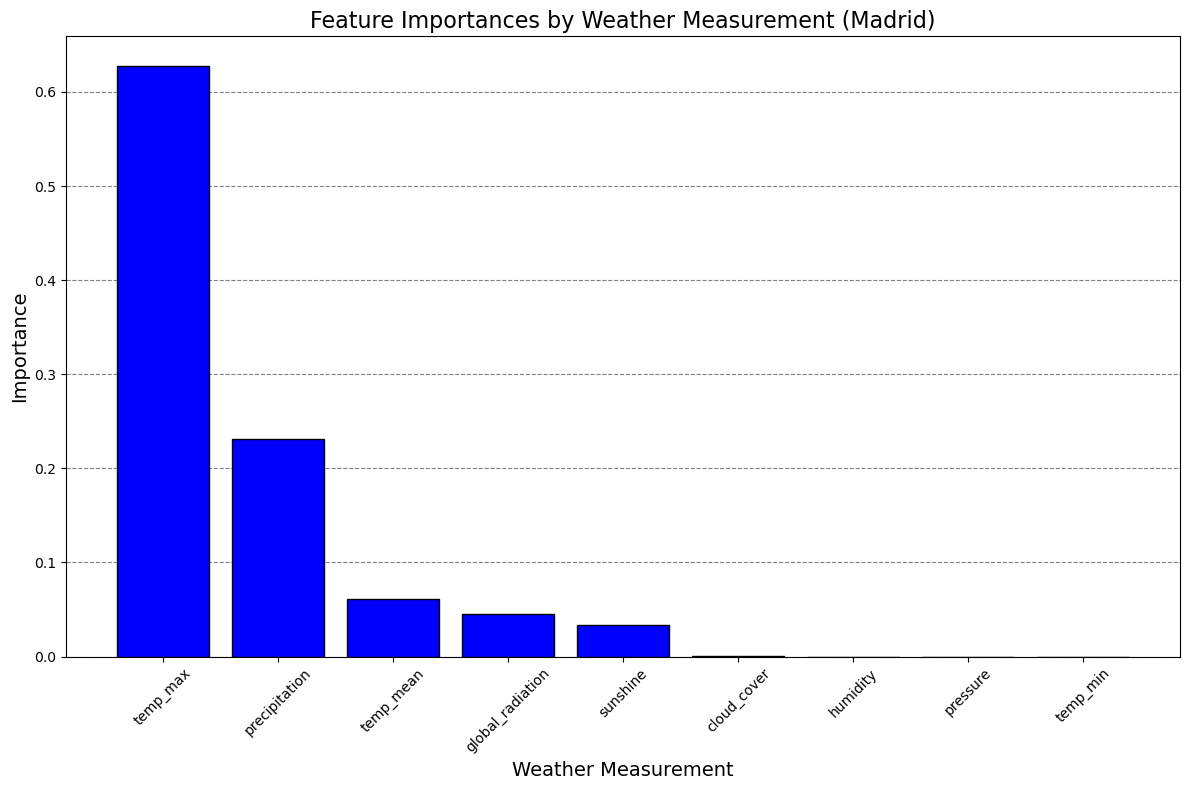

In [88]:
# Plot the importances

madrid_importances_plot = plt.figure(figsize=(12, 8))
plt.bar(madrid_importances_df['Weather Measurement'], madrid_importances_df['Importance'], color = 'blue', zorder = 2, edgecolor = 'black')
plt.xticks(rotation = 45, ha = 'center')
plt.xlabel('Weather Measurement', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Measurement (Madrid)', fontsize=16)
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.tight_layout()
plt.show()

In [90]:
# Save importances_plot
madrid_importances_plot.savefig(os.path.join(path, '04 Analysis', 'Random Forests', 'Optimised_grid_Madrid_Importances_Plot.png'),bbox_inches='tight')

#### Using Hyperparameters from Random Search:

In [91]:
# Create Random Forest Classifier (random search parameters now)
clf_mad4 = RandomForestClassifier(n_estimators = 110, 
                                  max_depth = 80, 
                                  max_features = 8, 
                                  min_samples_leaf = 3, 
                                  min_samples_split = 4,
                                  criterion = 'gini'
                                 )

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_mad4.fit(X_train_mad, y_train_mad)

RandomForestClassifier(max_depth=80, max_features=8, min_samples_leaf=3,
                       min_samples_split=4, n_estimators=110)

In [92]:
# Performing predictions on the test dataset
y_pred_mad = clf_mad4.predict(X_test_mad)
  
# Using metrics module for accuracy calculation
print("Model Accuracy: ", (metrics.accuracy_score(y_test_mad, y_pred_mad))*100,'%')

Model Accuracy:  100.0 %


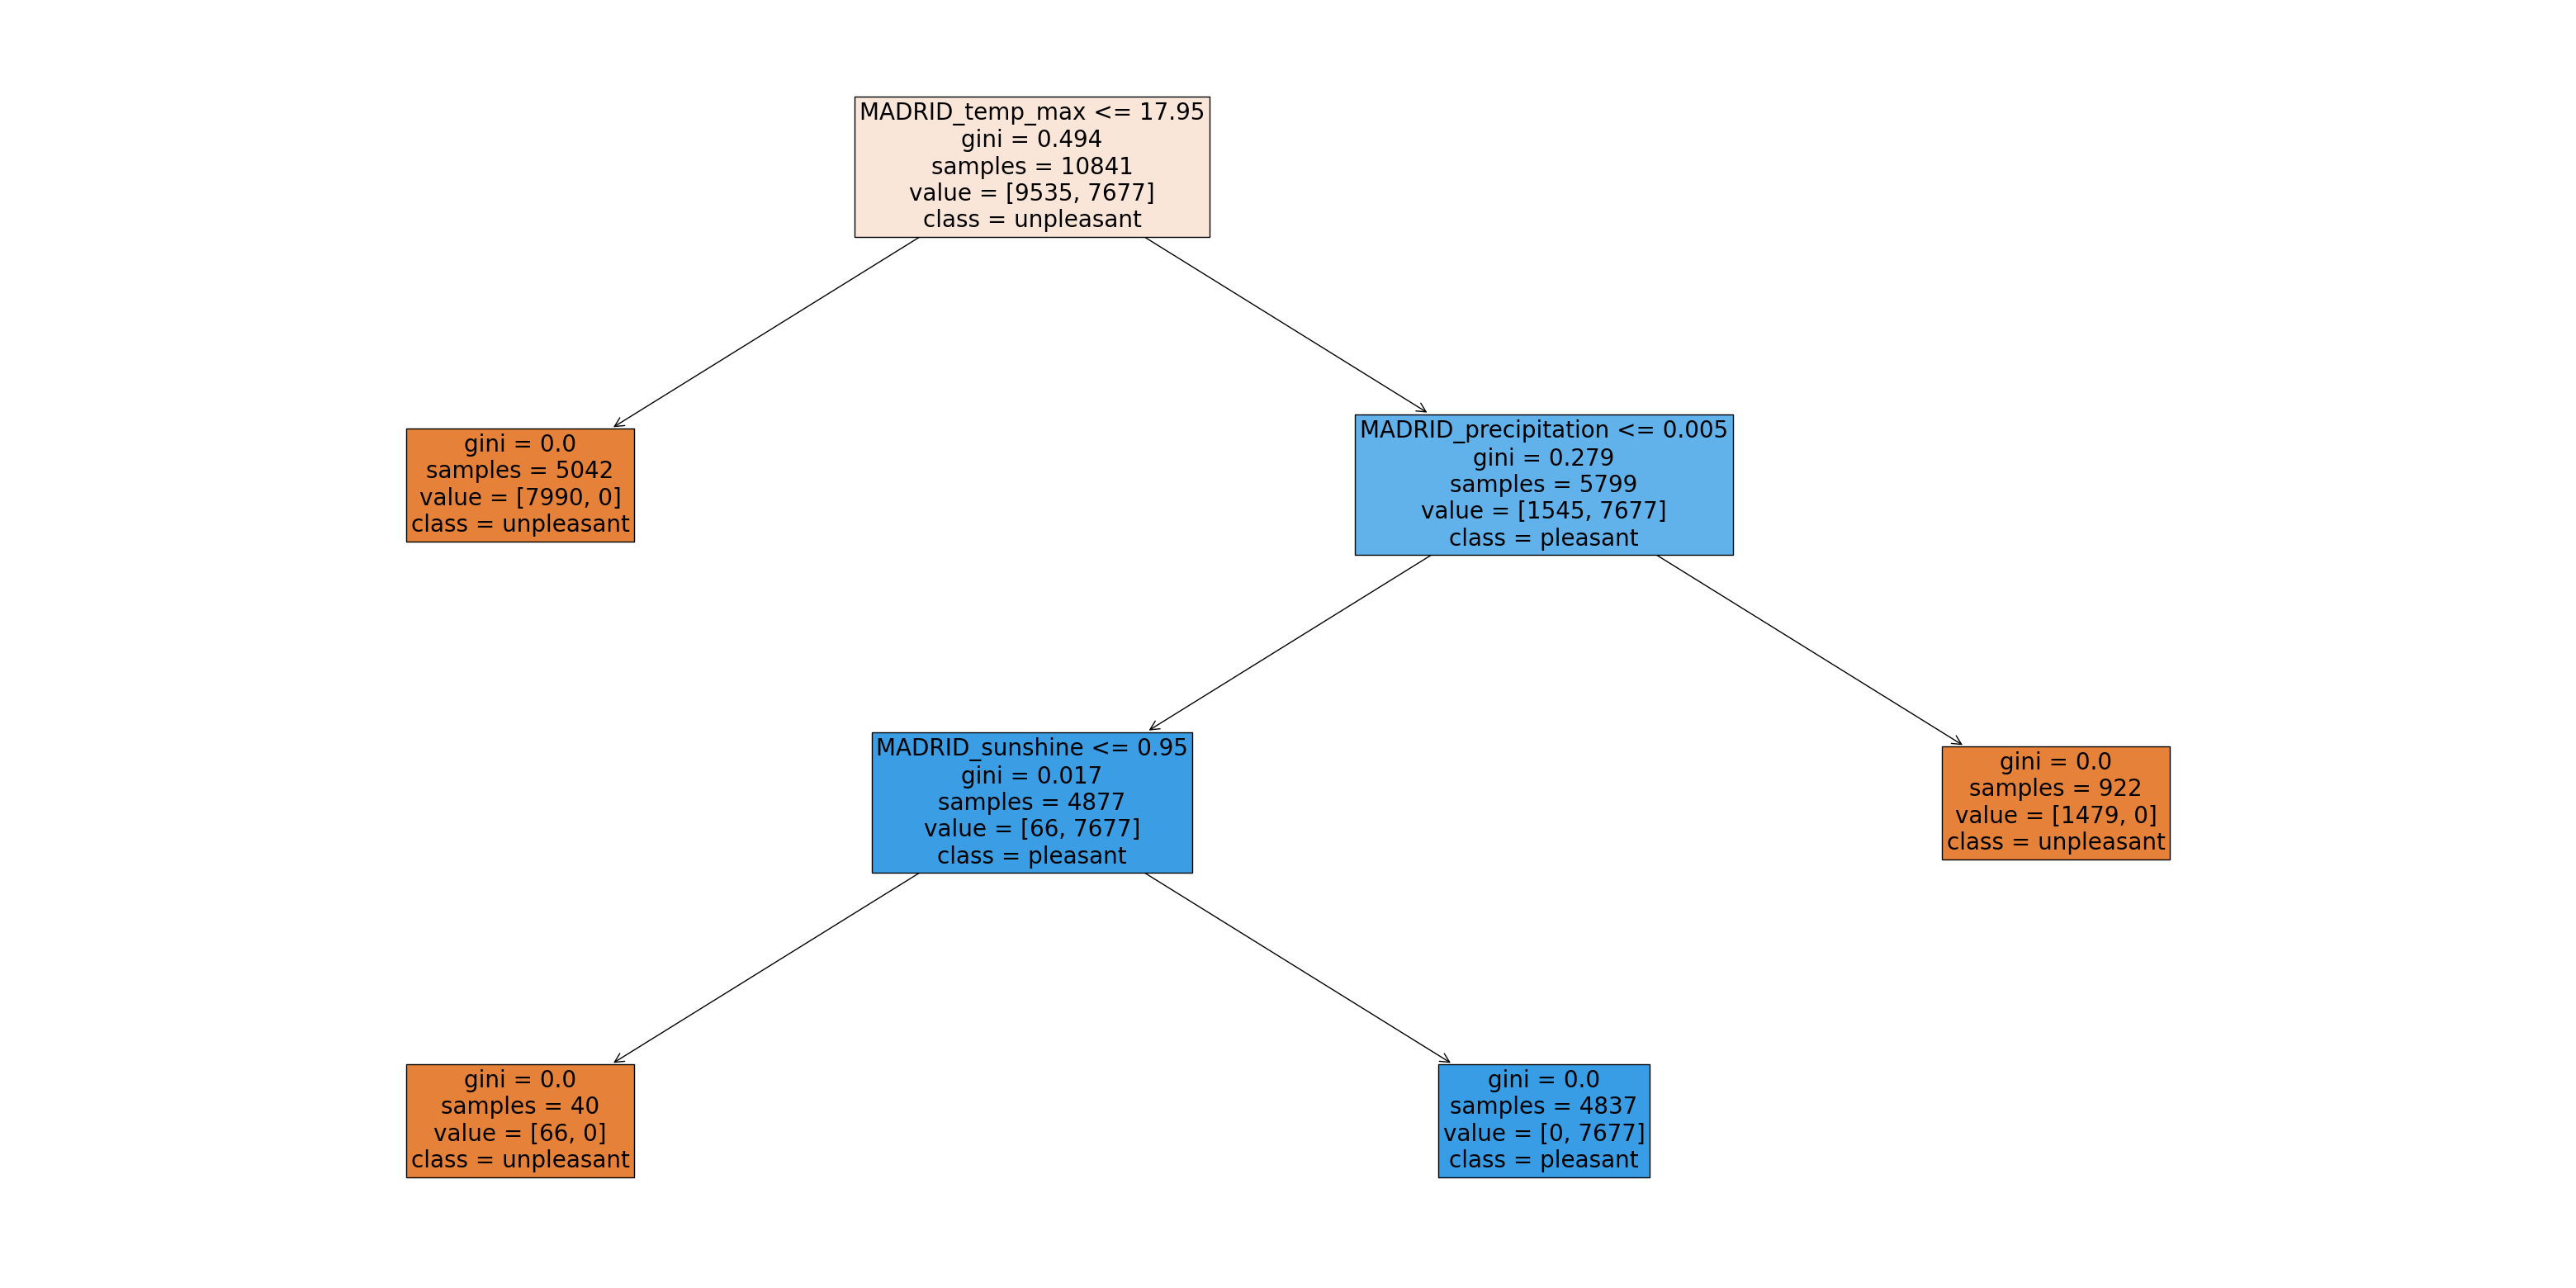

In [93]:
# Plot random forest (Madrid)
Madrid_tree = plt.figure(figsize=(40,20))
plot_tree(clf_mad4.estimators_[5], fontsize = 20, feature_names = X_mad.columns, class_names = class_names, filled = True)
plt.show();

In [94]:
# Save the decision tree for Madrid
Madrid_tree.savefig(os.path.join(path, '04 Analysis', 'Random Forests', 'Optimised_random_Madrid_tree.png'), bbox_inches = 'tight')

***Feature Importances Madrid (random)***

In [95]:
feature_importances_mad4 = clf_mad4.feature_importances_
print(feature_importances_mad4)
print(feature_importances_mad4.shape)

[1.81715990e-04 3.35421929e-05 0.00000000e+00 8.62309008e-04
 2.66875060e-01 2.02498629e-02 2.12882103e-02 0.00000000e+00
 6.90509299e-01]
(9,)


In [96]:
# Turn importances into a DataFrame with their associated weather measurments
## Start by creating a list of weather measurements
weather_measurements = ['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']

madrid_importances_df = pd.DataFrame({'Weather Measurement' : weather_measurements, 'Importance' : feature_importances_mad4}).sort_values(by = 'Importance', ascending = False)
madrid_importances_df

,Weather Measurement,Importance
8,temp_max,0.690509
4,precipitation,0.266875
6,temp_mean,0.021288
5,sunshine,0.020250
3,global_radiation,0.000862
0,cloud_cover,0.000182
1,humidity,0.000034
2,pressure,0.000000
7,temp_min,0.000000


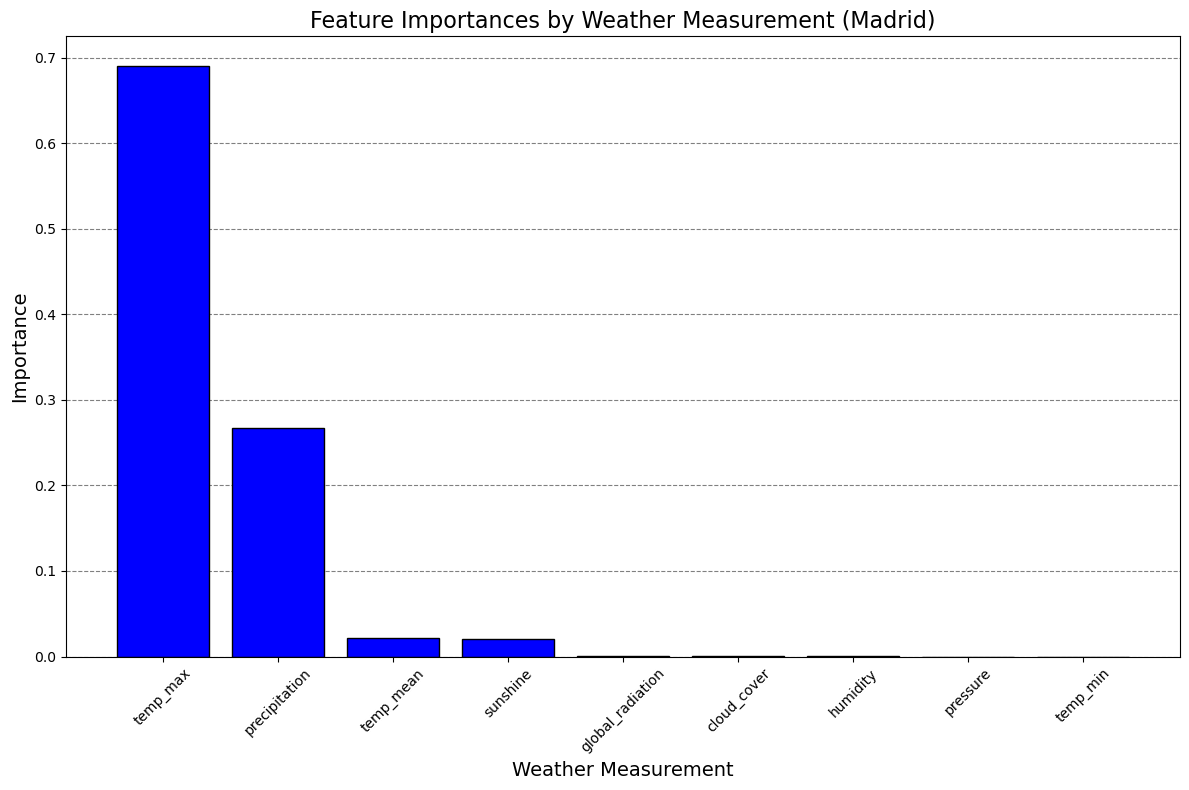

In [97]:
# Plot the importances

madrid_importances_plot = plt.figure(figsize=(12, 8))
plt.bar(madrid_importances_df['Weather Measurement'], madrid_importances_df['Importance'], color = 'blue', zorder = 2, edgecolor = 'black')
plt.xticks(rotation = 45, ha = 'center')
plt.xlabel('Weather Measurement', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Measurement (Madrid)', fontsize=16)
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.tight_layout()
plt.show()

In [98]:
# Save importances_plot
madrid_importances_plot.savefig(os.path.join(path, '04 Analysis', 'Random Forests', 'Optimised_random_Madrid_Importances_Plot.png'),bbox_inches='tight')